In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_excel('C:/Users/jcoliveira/Desktop/TCC/Projeto/DataBase.xlsx')

In [23]:
y = data.Resultado
x = data.drop(columns = ['Resultado'])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Normalização dos dados
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24878, 22), (10662, 22), (24878,), (10662,))

In [25]:
model = SVC(
    C=1.0, kernel='rbf',
    gamma='scale',
    probability=True,
    class_weight='balanced'
)
model.fit(x_train,y_train)

SVC(class_weight='balanced', probability=True)

In [26]:
# C=1.0 									- Um valor pequeno de C fará com que o modelo tente maximizar a margem (permitindo mais erros de classificação), enquanto um valor grande de C penaliza mais os erros de classificação, levando o modelo a tentar classificar cada amostra corretamente.
# kernel = 'rfb' 'linear' 'poly' 'sigmoid'	- mapeia os dados para um espaço de dimensão mais alta, onde eles se tornam linearmente separáveis.
# degree=3 									- Usado apenas se o kernel for 'poly'. Define o grau do polinômio no kernel polinomial.
# gamma = 'scale' 	'auto'					- Valores pequenos de gamma significam que a influência de cada amostra é maior, enquanto valores altos indicam que a influência de cada amostra é menor.
# coef0=0.0 								- Usado apenas com os kernels 'poly' e 'sigmoid'. Controla a influência de termos independentes no kernel.
# probability = false 						- Se for True, habilita a probabilidade estimada para as classes. Isso consome mais recursos, pois exige um passo adicional de cálculo durante o ajuste do modelo.
# class_weight = none 'balanced'			- Permite atribuir pesos diferentes para classes diferentes. Isso pode ser útil quando há um desbalanceamento nas classes.
# max_iter = -1 							- o número máximo de iterações para o otimizador. Um valor negativo significa que o otimizador irá rodar indefinidamente até convergir.
# random_state = nome 						- Controla a aleatoriedade do embaralhamento durante o ajuste do modelo, quando relevante.
# tol=1e-3 									- Define a tolerância para o critério de parada. Isso controla a precisão com que a solução será encontrada.

In [27]:
predict_resultado = model.predict(x_test)

In [28]:
acuracia = metrics.accuracy_score(y_test, predict_resultado)
print(f"Acurácia: {acuracia * 100:.2f}%\t-\tAC = {acuracia:.3f}") # acuracia = previsões correta / total de amostras

precisao = metrics.precision_score(y_test, predict_resultado, average='binary')  # Para classificação binária
print(f"Precisão: {precisao * 100:.2f}%\t-\tPR = {precisao:.3f}") # precisão = VP / VP + FP

recall = metrics.recall_score(y_test, predict_resultado, average='binary')
print(f"  Recall: {recall * 100:.2f}%\t-\tRC = {recall:.3f}")       # recall = = VP / VP + FN

f1 = metrics.f1_score(y_test, predict_resultado, average='binary')
print(f"F1-Score: {f1 * 100:.2f}%\t-\t F = {f1:.3f}")              # f1 = média harmônica entre a precisão e o recall, equilibrando ambas as métricas

Acurácia: 65.57%	-	AC = 0.656
Precisão: 66.18%	-	PR = 0.662
  Recall: 65.36%	-	RC = 0.654
F1-Score: 65.77%	-	 F = 0.658


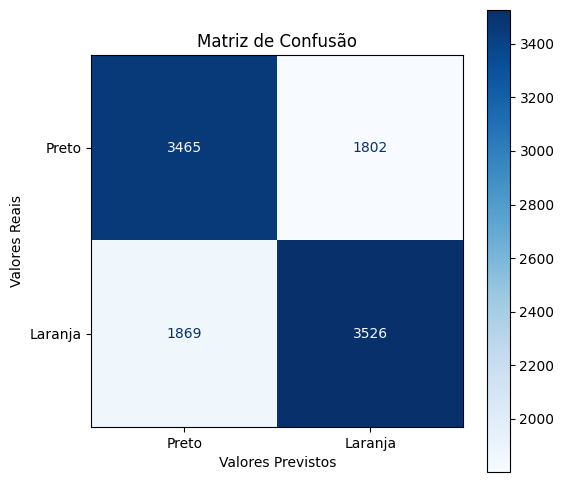

In [29]:
cm = metrics.confusion_matrix(y_test, predict_resultado)
VN, FP, FN, VP = cm.ravel()

# 1º gráfico: Matriz de confusão
plt.figure(figsize=(6, 6))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Preto", "Laranja"])
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

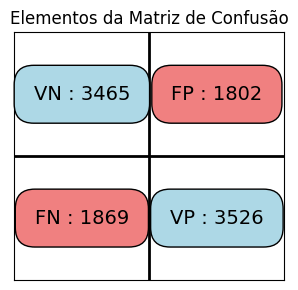

In [30]:
# 2º gráfico: Apresentação de VP, VN, FP, FN em formato de quadrantes
fig, ax = plt.subplots(figsize=(3, 3))
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.text(0.5, 1.5, f'VN : {VN}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.5, 1.5, f'FP : {FP}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=1'))
ax.text(0.5, 0.5, f'FN : {FN}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.5, 0.5, f'VP : {VP}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))
ax.plot([1, 1], [0, 2], color='black', lw=2)
ax.plot([0, 2], [1, 1], color='black', lw=2)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Elementos da Matriz de Confusão')
plt.tight_layout()
plt.show()